In [5]:
import sys
import os

# Go up two levels
grandparent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(grandparent_dir)

# Path to a subdirectory inside that grandparent directory
data_folder_path = os.path.join(grandparent_dir, "data_folder")
sys.path.append(data_folder_path)

from synth_dim_model import *
from plotting_utils import *

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import concurrent.futures
plt.rcParams.update({'font.size': 12})

In [6]:
N = 2
M = 3
V = -1
dt = 0.1

J_V_init = 0.1
J_V_final = 0
mu_V_init = 10
mu_V_final = 0

num_control_points = 12

Ts = np.linspace(0.1,10,25)
ground_state_overlaps = []
energy_differences = []

opt_params = None

for T in Ts:
    
    print(f"\nOptimizing for T = {T}")
    
    results = create_optimal_piecewise_linear_paths(
        N, M, T, dt, V,
        J_V_init, J_V_final,
        mu_V_init, mu_V_final,
        num_control_points,
        initial_guess=opt_params
    )
    
    times_dense, J_V_path, mu_V_path, obj_value, opt_params, t_control_opt, J_control_opt, mu_control_opt = results
    
    hamiltonians = [construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_path[i], J_V_ratio=J_V_path[i]) for i in range(len(times_dense))]
    final_results = simulate_hamiltonian_time_evolution(hamiltonians, times_dense)
    energies, time_evolved_wavefunctions, state_probabilities, state_overlaps, true_energies, ground_state_manifold_overlaps = final_results
    gso = ground_state_manifold_overlaps[-1]
    ground_state_overlaps.append(gso)
    ed = energies[-1] - true_energies[-1,0]
    energy_differences.append(ed)
    
    print(f"GROUND_STATE_OVERLAP: {gso:.6f}")
    print(f"ENERGY_DIFFERENCE: {ed:.6f}")
    print()
    
print("All finished:")
print(f"Evolution Times: {Ts}")
print(f"Ground State Overlaps = {ground_state_overlaps}")
print(f"Energy Differences = {ground_state_overlaps}")


Optimizing for T = 0.1
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9997531595679412
            Iterations: 1
            Function evaluations: 31
            Gradient evaluations: 1
Success: True
GROUND_STATE_OVERLAP: 0.000247
ENERGY_DIFFERENCE: 0.999753


Optimizing for T = 0.5125000000000001
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5308025599102437
            Iterations: 56
            Function evaluations: 1750
            Gradient evaluations: 56
Success: True
GROUND_STATE_OVERLAP: 0.543628
ENERGY_DIFFERENCE: 0.456372


Optimizing for T = 0.925
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45017128733764417
            Iterations: 30
            Function evaluations: 1017
            Gradient evaluations: 30
Success: True
GROUND_STATE_OVERLAP: 0.594157
ENERGY_DIFFERENCE: 0.405843


Optimizing for T = 1.3375000000000001
Optimization term

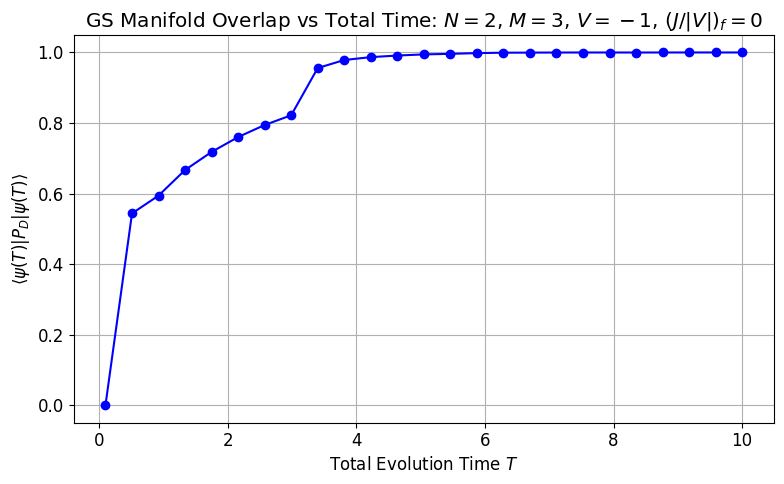

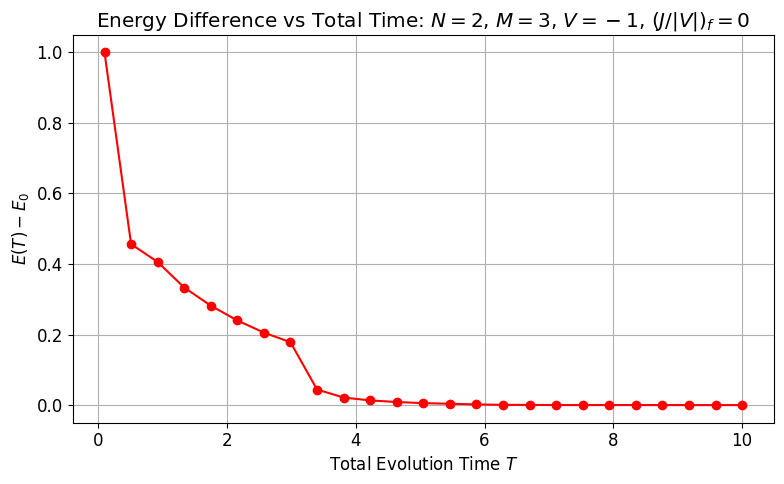

In [7]:
plt.figure(figsize=(8,5))
plt.plot(Ts, ground_state_overlaps, marker='o', color = "blue")
plt.xlabel('Total Evolution Time $T$')
plt.ylabel('$\langle \psi(T) | P_D | \psi(T) \\rangle$')
plt.title(f'GS Manifold Overlap vs Total Time: $N = {N}$, $M = {M}$, $V = {V}$, $(J/|V|)_f = {J_V_final}$')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(Ts, energy_differences, marker='o', color = "red")
plt.xlabel('Total Evolution Time $T$')
plt.ylabel('$E(T) - E_0$')
plt.title(f'Energy Difference vs Total Time: $N = {N}$, $M = {M}$, $V = {V}$, $(J/|V|)_f = {J_V_final}$')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
if V > 0:
    plot_data(N, M, sign_V = "positive", gap_or_sigma="energy_gap", include_path=True, mu_V_ratios=mu_V_path, J_V_ratios=J_V_path, times=times_dense)
else:
    plot_data(N, M, sign_V = "negative", gap_or_sigma="energy_gap", include_path=True, mu_V_ratios=mu_V_path, J_V_ratios=J_V_path, times=times_dense)

Error: File c:\Users\Joe\OneDrive\Documents\GitHub\synthetic_dimensions\adiabatic_state_prep\data_folder\energy_gap_V_negative_N=2_M=3.csv not found.
